In [1]:
import shap
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


In [3]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target


In [4]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost model
model = xgb.XGBRegressor().fit(X_train, y_train)

# Create a SHAP explainer
explainer = shap.Explainer(model, X_train)

# Calculate SHAP values for the test data
shap_values = explainer(X_test)


 99%|===================| 4068/4128 [01:03<00:00]        

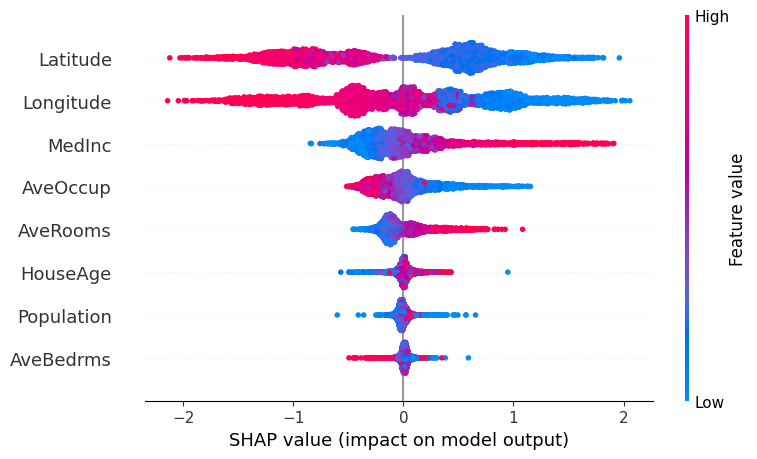

In [5]:

# Plot the summary plot
shap.summary_plot(shap_values, X_test)


In [10]:
# Plot the dependence plot for a specific feature
shap.dependence_plot("MedInc", shap_values, X_test)

TypeError: loop of ufunc does not support argument 0 of type Explanation which has no callable conjugate method

In [8]:

# Plot the force plot for a single prediction
shap.force_plot(explainer.expected_value, shap_values[0].values, X_test.iloc[0])


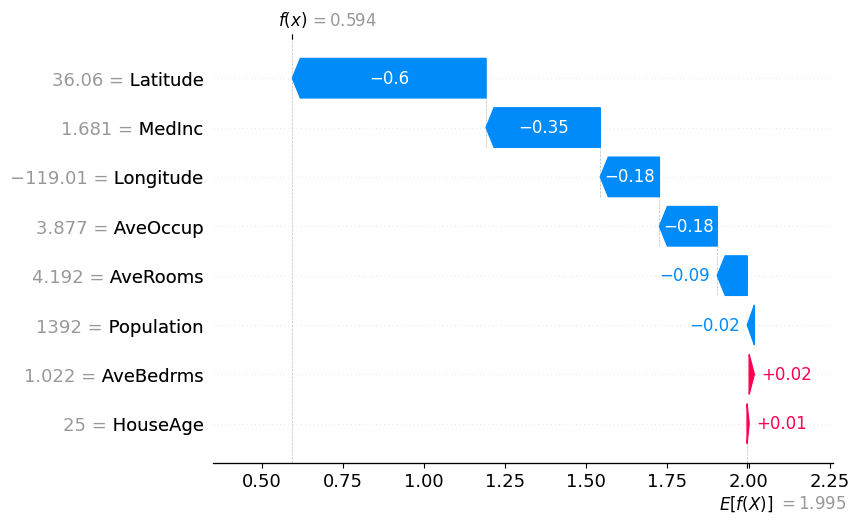

In [9]:

# Plot the waterfall plot for a single prediction
shap.waterfall_plot(shap_values[0])

In [20]:
shap_values

.values =
array([[-0.35184397,  0.00643011, -0.09260493, ..., -0.17811682,
        -0.59679932, -0.1822025 ],
       [-0.37439958,  0.02016383, -0.08634274, ..., -0.05995747,
        -0.75436034, -0.00934322],
       [ 0.10265798,  0.42832245, -0.11764337, ...,  0.9107625 ,
        -0.15097981,  1.9947925 ],
       ...,
       [ 1.56759838,  0.04920795,  0.46820765, ...,  0.02827708,
        -0.35719893,  1.23111745],
       [-0.20472475, -0.01326079, -0.08787213, ...,  0.02696248,
        -0.96767856,  0.01488935],
       [-0.00644163, -0.02804565, -0.21970146, ..., -0.25249866,
         0.35257415,  0.00564972]])

.base_values =
array([1.99537478, 1.99537478, 1.99537478, ..., 1.99537478, 1.99537478,
       1.99537478])

.data =
array([[   1.6812    ,   25.        ,    4.19220056, ...,    3.87743733,
          36.06      , -119.01      ],
       [   2.5313    ,   30.        ,    5.03938356, ...,    2.67979452,
          35.14      , -119.46      ],
       [   3.4801    ,   52.        

In [23]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])